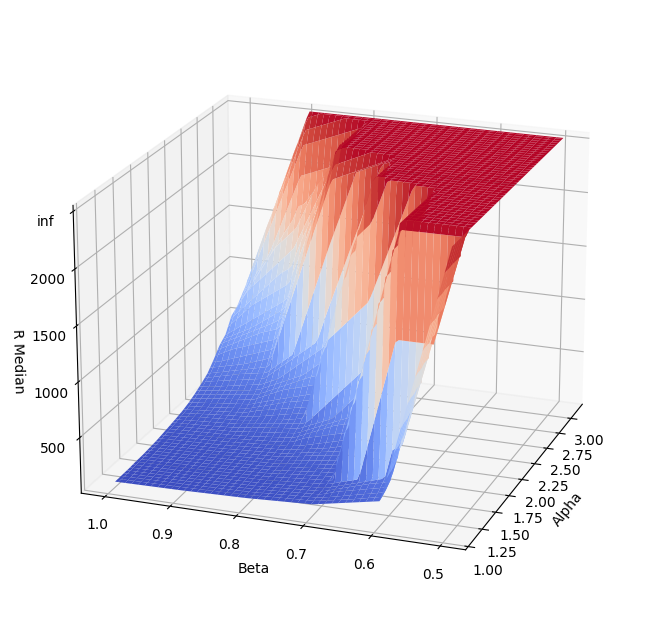

In [1]:
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator
import datetime

# Reading the data from the file
df = pd.read_csv('covid19-sir-simulation-results-final-v2.csv', sep=';')

# Replacing 'inf' values in 'r_median' column with 1000
df['r_median'] = df['r_median'].replace(np.inf, 2500)

# Creating grid values for interpolation
xi = np.linspace(df['alpha'].min(), df['alpha'].max(), 100)
yi = np.linspace(df['beta'].min(), df['beta'].max(), 100)  # Inverting the y-axis
xi, yi = np.meshgrid(xi, yi)

# Linear interpolation
linear_interp = LinearNDInterpolator(list(zip(df['alpha'], df['beta'])), df['r_median'])
zi_linear = linear_interp(xi, yi)

# Creating a 3D surface plot with linear interpolation
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xi, yi, zi_linear, cmap='coolwarm')

ax.set_xlabel('Alpha')
ax.set_ylabel('Beta')
ax.set_zlabel('R Median')

# Inverting the y-axis
# ax.set_ylim([df['beta'].max(), df['beta'].min()])

def format_z_tick(val, pos):
    return 'inf' if val == 2500 else int(val)
ax.zaxis.set_major_formatter(FuncFormatter(format_z_tick))

# Adjusting the view angle for desired perspective
ax.view_init(elev=20, azim=200)

# Setting the limits for the x-axis
ax.set_xlim([1.0, df['alpha'].max()])

current_datetime = datetime.datetime.now()
formatted_datetime = current_datetime.strftime("%Y-%m-%d-%H-%M-%S")

plt.savefig("covid19-sir-simulation-3d-visualization-" + formatted_datetime)

plt.show()